In [2]:
# Projeto: Predição de Emissões de CO2 com Machine Learning
# Autor: Cible Souza
# Data: 2025-11
#O projeto tem como foco fazer um piloto para a análise e Predição de Emissões de CO₂ com Machine Learning partir de variáveis socioeconômicas e energéticas, utilizando dados públicos do Kaggle.
#Para mais inforações leia o arquivo README
#o documento (co2_emission) retirado do Kaggle foi CO2_GHG_emissions-data ( dataset contains CO2 and GHG emissions for countries since 1750 until 2017.)
#-->C:/Users/User/Projetos/Projeto1/co2_emission.csv

#https://www.kaggle.com/datasets/yoannboyere/co2-ghg-emissionsdata

In [25]:
import sys
print(sys.executable)



C:\Users\User\anaconda3\envs\ds\python.exe


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Ambiente correto e bibliotecas carregadas!")


✅ Ambiente correto e bibliotecas carregadas!


In [28]:
#kernel agora está: C:\Users\User\anaconda3\envs\ds\python.exe

In [29]:
#agora vamos para o carregamento do doc do keggle

In [33]:
#venod as primerias linhas da tabela 

import pandas as pd

caminho = "C:/Users/User/Projetos/Projeto1/co2_emission.csv"

df = pd.read_csv(caminho)

print("Dimensões do dataset:", df.shape)
df.head()


Dimensões do dataset: (20853, 4)


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [35]:
#Nomes e colunas sem padrao entao é necessaro fazer  lower e substituir espaços
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns



Index(['entity', 'code', 'year', 'annual_co₂_emissions_(tonnes_)'], dtype='object')

In [37]:
print(df.head())




        entity code  year  annual_co₂_emissions_(tonnes_)
0  Afghanistan  AFG  1949                         14656.0
1  Afghanistan  AFG  1950                         84272.0
2  Afghanistan  AFG  1951                         91600.0
3  Afghanistan  AFG  1952                         91600.0
4  Afghanistan  AFG  1953                        106256.0


In [39]:
print(df.columns)

Index(['entity', 'code', 'year', 'annual_co₂_emissions_(tonnes_)'], dtype='object')


In [41]:
#padronização das colunas emissoes
# Padronizar nome da coluna de emissões
df = df.rename(columns={
    'entity': 'country',
    'annual_co₂_emissions_(tonnes_)': 'co2'
})

df.head()


,country,code,year,co2
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [43]:
#remover entradas invalidas no caso
# Converter ano para inteiro
df['year'] = df['year'].astype(int)

# Remover linhas onde CO2 é nulo
df = df.dropna(subset=['co2'])

print(df.info())
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  20853 non-null  object 
 1   code     18646 non-null  object 
 2   year     20853 non-null  int64  
 3   co2      20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB
None


,country,code,year,co2
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [45]:
#vamos para visualizçaão das emissoes globais ao longo do tempo 

In [47]:
#Grafico 1 - Evolução Global das Emissões de CO₂ (em toneladas)

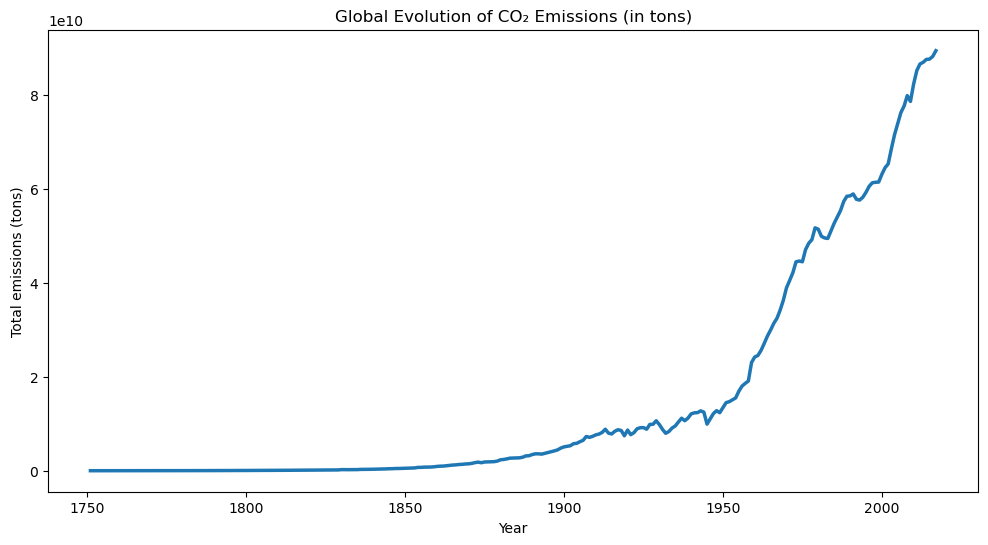

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

global_trend = df.groupby('year')['co2'].sum().reset_index()

sns.lineplot(data=global_trend, x='year', y='co2', linewidth=2.5)
plt.title("Global Evolution of CO₂ Emissions (in tons)")
plt.xlabel("Year")
plt.ylabel("Total emissions (tons)")

# ✅ SALVAR O GRÁFICO
plt.savefig("C:/Users/User/Projetos/Projeto1/global_co2_trend.png", dpi=300, bbox_inches="tight")

plt.show()



In [51]:
#Grafico 2 - Top 10 países mais emissores no último ano disponível

C:\Users\User\AppData\Local\Temp\ipykernel_7552\2621945311.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='Reds_r')


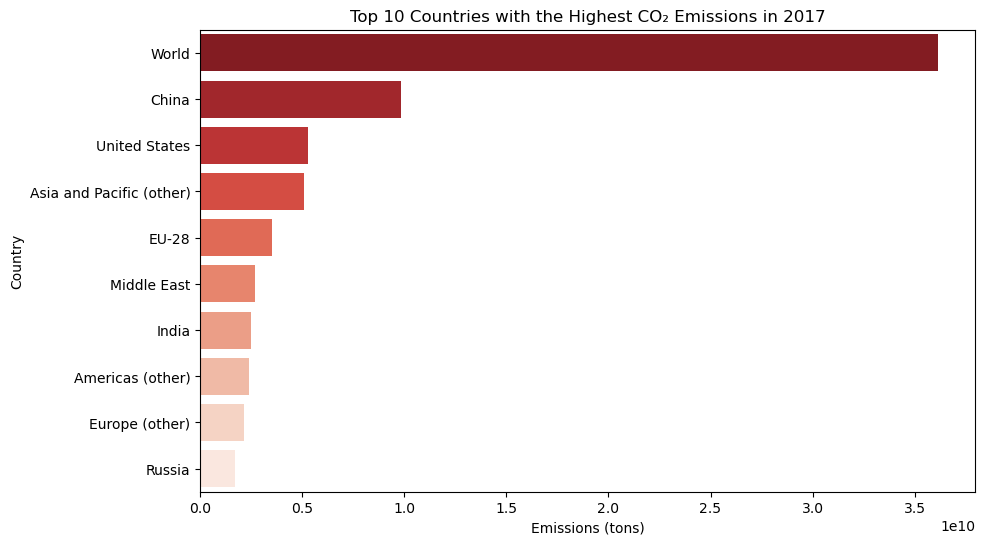

In [80]:
# Gráfico 2 - Top 10 países mais emissores no último ano disponível

latest_year = df['year'].max()

top = (
    df[df['year'] == latest_year]
    .groupby('country')['co2']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top.values, y=top.index, palette='Reds_r')

plt.title(f"Top 10 Countries with the Highest CO₂ Emissions in {latest_year}")
plt.xlabel("Emissions (tons)")
plt.ylabel("Country")

# ✅ SALVAR O GRÁFICO
plt.savefig("C:/Users/User/Projetos/Projeto1/top10_emitters.png", dpi=300, bbox_inches="tight")

plt.show()



In [55]:
#Grafico 3 - Série histórica para um país específico ---> BRAZIL

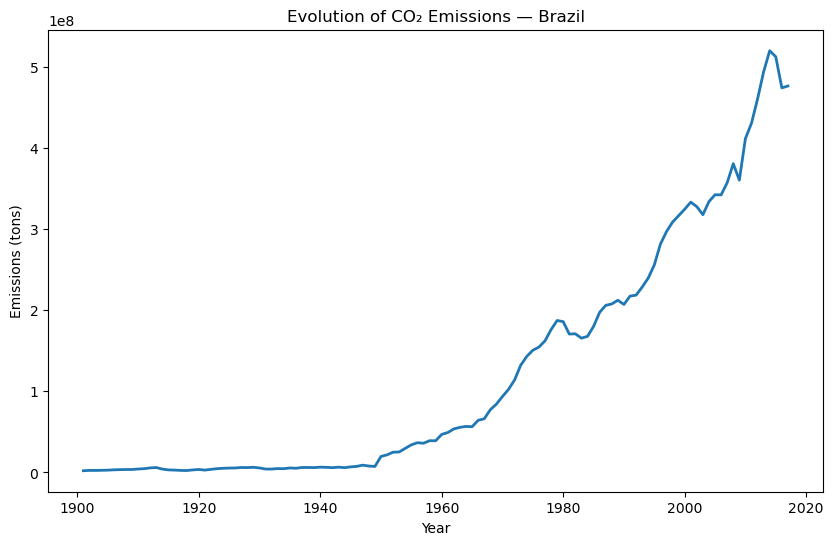

In [82]:
# Gráfico 3 - Série histórica para um país específico (Brasil)

country_name = "Brazil"  # você pode mudar para qualquer país

country_data = df[df['country'] == country_name]

plt.figure(figsize=(10,6))
sns.lineplot(data=country_data, x='year', y='co2', linewidth=2.0)
plt.title(f"Evolution of CO₂ Emissions — {country_name}")
plt.xlabel("Year")
plt.ylabel("Emissions (tons)")

# ✅ SALVAR O GRÁFICO
plt.savefig("C:/Users/User/Projetos/Projeto1/brazil_co2_historical.png", dpi=300, bbox_inches="tight")

plt.show()



In [59]:
#Grafico 4 - Descobrir o ano de pico de emissões da Espanha

In [61]:
#Espanha X França, Alemanha, Itália, Portugal

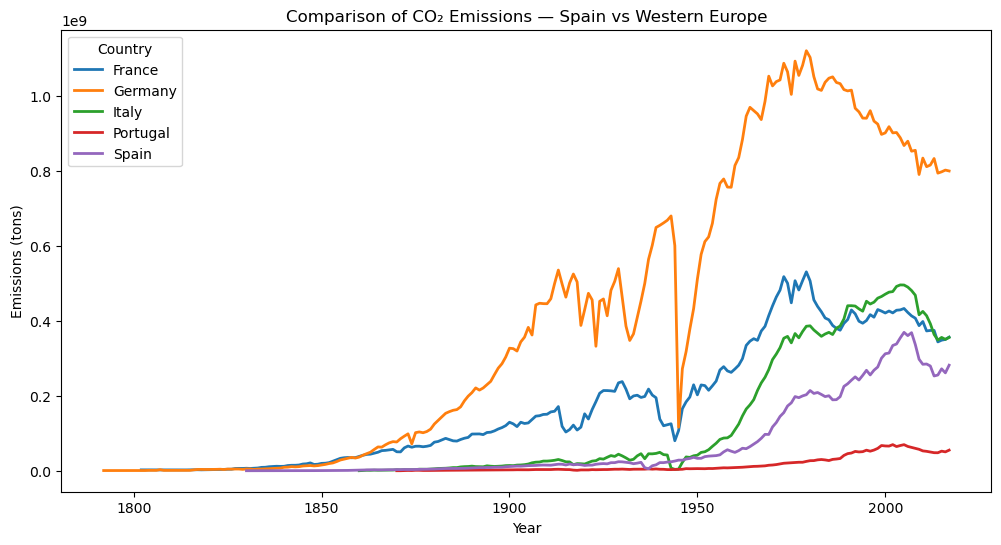

In [84]:
# Gráfico 4 - Comparação Espanha vs Europa Ocidental

europe_compare = df[df['country'].isin(["Spain", "France", "Germany", "Italy", "Portugal"])]

plt.figure(figsize=(12,6))
sns.lineplot(data=europe_compare, x='year', y='co2', hue='country', linewidth=2.0)

plt.title("Comparison of CO₂ Emissions — Spain vs Western Europe")
plt.xlabel("Year")
plt.ylabel("Emissions (tons)")
plt.legend(title="Country")

# ✅ SALVAR O GRÁFICO
plt.savefig("C:/Users/User/Projetos/Projeto1/spain_vs_europe.png", dpi=300, bbox_inches="tight")

plt.show()



In [65]:
# Grafico 5 - Previsão simples para os próximos anos (modelo linear)

In [67]:
#extrapolação matemática baseada na tendência recente.

In [86]:
country_name = "Spain"

spain = df[df['country'] == country_name].copy()

print("Registros encontrados:", len(spain))
display(spain.head())

# ✅ SALVAR COMO CSV
spain.to_csv("C:/Users/User/Projetos/Projeto1/spain_co2_table.csv", index=False)

print("✅ Tabela salva em: C:/Users/User/Projetos/Projeto1/spain_co2_table.csv")




Registros encontrados: 188


,country,code,year,co2
17122,Spain,ESP,1830,3664.0
17123,Spain,ESP,1831,3664.0
17124,Spain,ESP,1832,3664.0
17125,Spain,ESP,1833,3664.0
17126,Spain,ESP,1834,3664.0


✅ Tabela salva em: C:/Users/User/Projetos/Projeto1/spain_co2_table.csv


In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Usar apenas os últimos 30 anos (tendência recente)
recent = spain[spain['year'] >= (spain['year'].max() - 30)]

X = recent[['year']]
y = recent['co2']

model = LinearRegression().fit(X, y)

future_years = np.arange(spain['year'].max()+1, spain['year'].max()+11)
y_pred = model.predict(future_years.reshape(-1,1))

forecast = pd.DataFrame({'year': future_years, 'predicted_co2': y_pred})
forecast



C:\Users\User\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,year,predicted_co2
0,2018,3.212738e+08
1,2019,3.237069e+08
2,2020,3.261399e+08
3,2021,3.285730e+08
4,2022,3.310060e+08
5,2023,3.334390e+08
6,2024,3.358721e+08
7,2025,3.383051e+08
8,2026,3.407381e+08
9,2027,3.431712e+08


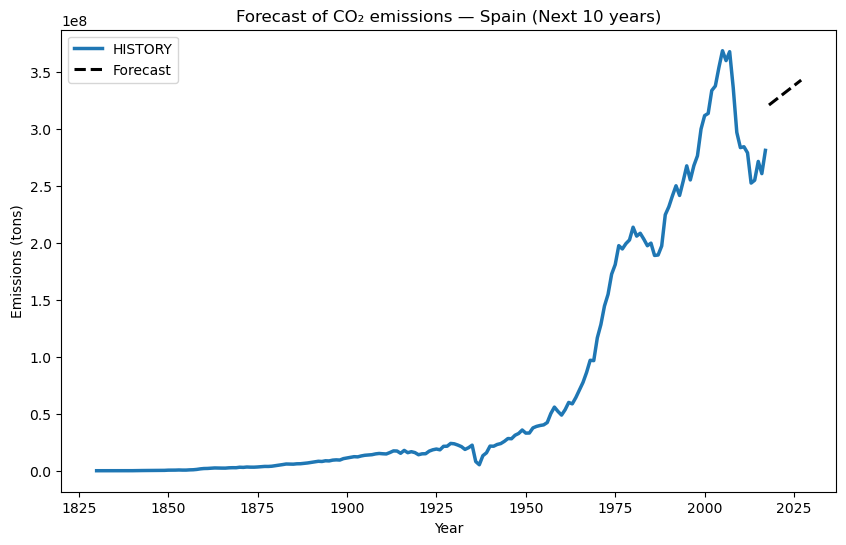

In [98]:
plt.figure(figsize=(10,6))
sns.lineplot(data=spain, x='year', y='co2', label='HISTORY', linewidth=2.5)
sns.lineplot(data=forecast, x='year', y='predicted_co2', linestyle='--', color='black', label='Forecast', linewidth=2.2)

plt.title(f"Forecast of CO₂ emissions — {country_name} (Next 10 years)")
plt.xlabel("Year")
plt.ylabel("Emissions (tons)")
plt.legend()

# ✅ SALVAR O GRÁFICO
plt.savefig("C:/Users/User/Projetos/Projeto1/spain_forecast.png", dpi=300, bbox_inches="tight")

plt.show()

